Simple Linear Regression

The relationship between the independent variables (X) and dependent variables (y) is represented by the following equation:

y = mX + c where y is the dependent variables which we are going to estimate or predict and X is the independent variables which we going to make predictions. m is the slope of regression line which represent the effect X has on y. <br> 

If X increases by 1 unit then y increases by m unit. This contidion will be true if X and y has linear relationship. c is known as constant or y-intercept. 

In this lab session, we are going to build simple linear regression model based on data where slope(m) and y-intercept(c) is derived from the data. The build regression model also includes error in data called residuals error which is the difference between the actual value and predicted value of y. Data provided to fit the linear regression is the continous value, so are going to predict the continous value. We are going to minimize Root Mean Square error.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The below command is used python's Pandas library to import CSV dataset

In [3]:
data = pd.read_csv('./dataset/Salary_Data.csv')


Let's check number of rows and columns of our dataset where rows and columns are stores as a tuple (number of rows, number of columns). In our imported dataset <br>
Number of rows are 30 and Number of columns are 2

In [4]:
data.shape


(30, 2)

Pandas descibe() method is used to view some basic stastistical details like percentile, mean, standard deviation 

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


The below is the 2D graph between 'Years of Experience ' and 'Salary' to find relationship between dependent and independet variable

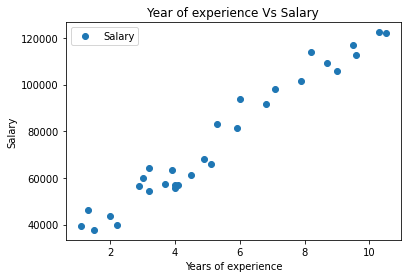

In [6]:
data.plot(x = 'YearsExperience', y ='Salary', style = 'o')
plt.title('Year of experience Vs Salary')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

Now, I am going to check the average salary, once I visulize the graph I can observer that the average salary is between 75000 to 100000

c:\users\arunb\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

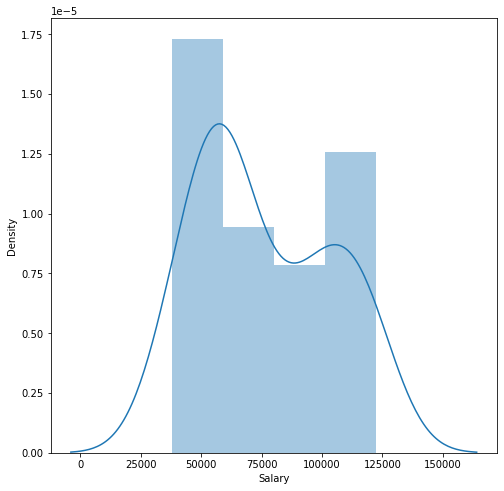

In [7]:
import seaborn as sns
plt.figure(figsize = (8,8))
plt.tight_layout()
sns.distplot(data['Salary'])

Now,our next task is to separate features and labels from our dataset. Our dataset contain only 2 columns where first column i.e. YearsExperience is independent variables and second column i.e. Salary is the dependent variable whose values are to be predicted. We want to predict Salary depending upon the YearsExperience. <br> 
So, we want store YearsExperience in X variable and Salary to y variable.

In [8]:
X = data.iloc[:, data.columns == 'YearsExperience'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [13]:
y = data.iloc[:, data.columns == 'Salary'].values.reshape(-1,1)

In [14]:
X[: 6] #input

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2],
       [2.9]])

In [15]:
y[:6] #output

array([[39343.],
       [46205.],
       [37731.],
       [43525.],
       [39891.],
       [56642.]])

In [16]:
X.shape, y.shape

((30, 1), (30, 1))

sklearn provides best function for partioning data into training set and testing set. We provide ceratin proportion of data to use as test set and we can provide the parameter random_state to ensure repeatable results. We split 80% of the data to the training set while 20% of data to the test using the below code.
The test_size variable is where spefify the proportion of the test set.

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 584)


After spliting data into train set and test set, now our job is to train our algorithm. For that we need to import LinearRegression to minimize the residual error of squares bwtween the observed target in the dataset, and the targets predicted by the linear approximation. <br>
Now, call the fit() method along with our training data. <br>
After training our algorithm, now time to make some predictions. For this we are going to use our test data and see how correctly our algorithm predicts the percentage score. 

In [18]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train) ## training the algorithm m = 0.020, c => -2.2 ==> y = 0.020*1.5 + (-2.2)

# Predicting the Test set results
y_pred = regressor.predict(X_test) #predicted salary by our LR model

In [19]:
print(regressor.intercept_) # to retrieve the intercept c valuse 

[25885.42172755]


In [20]:
print(regressor.coef_) # to retreive the slope

[[9493.96264667]]


In [13]:
# y = 9493.96* X + 25885.42 = 


The below 2D graph between the 'Year of Experience' and 'Salary' from the training set. Where the dependent variable 'salary' close nearer to the independent variable 'Year of experience'

In [21]:
print(regressor.score(X_train, y_train))

0.9573222943370868


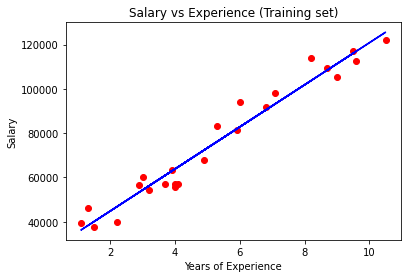

In [22]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Now compare the the actual output with predict output, using following script

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,43525.0,44873.347021
1,64445.0,56266.102197
2,66029.0,74304.631226
3,122391.0,123673.236988
4,101302.0,100887.726636
5,61111.0,68608.253638


We can use the bar graph to compare result between the actual and predicted results. The number of record is huge, for visulizing the graph I am taking only 10 records. The below graph shows that our model is precise. The predicted values are close nearer to actual values.  

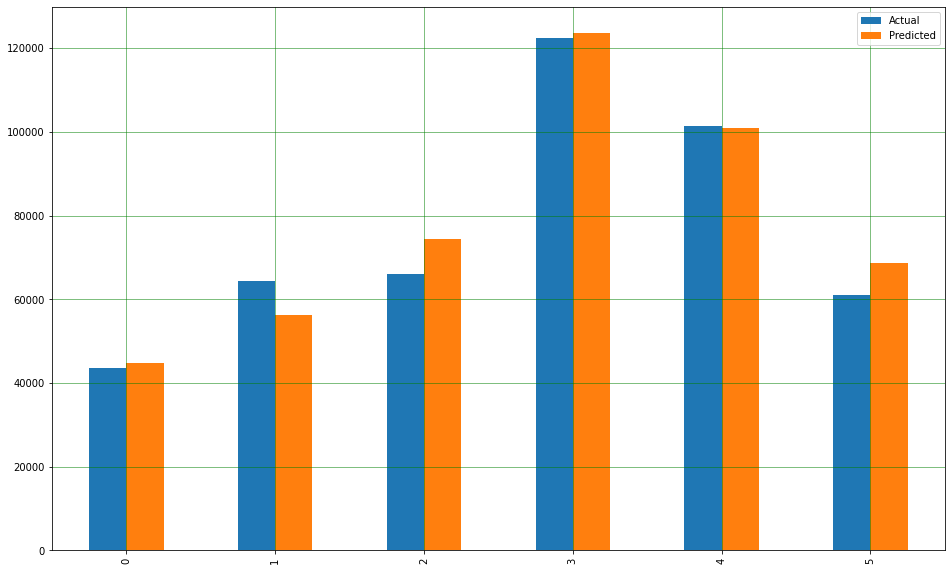

In [17]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

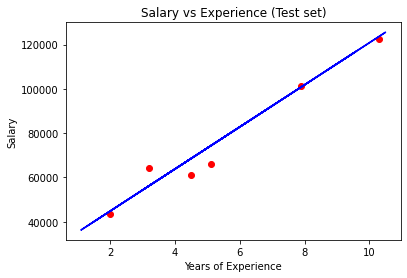

In [18]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The straight line passing through each scatter point shows in the above graph shows our algorithm is correct. 

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4499.440006518591
Mean Squared Error: 32537174.560607065
Root Mean Squared Error: 5704.136618332967


Mean Absolute Error (MAE) , Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are the evaluation metrics  of linear regression to compare how well algorithm perform on a particular dataset.
    1. Mean Absolute Error (MAE): Mean of absolute value of the error which is calculated as:
MAE = $
\frac{1}n\sum_{i=1}^n|Y_i - y_i|
$

    2. Mean Squared Error: It is mean of the squared errors which is calculated as:
MSE = $
\frac{1}n\sum_{i=1}^n(Y_i - y_i)^2
$

    3. Root Mean Squared Error (RMSE): It is squared root of the mean of the squred errors and whihc is calculated as:
RMSE = $\sqrt{\frac{1}n\sum_{i=1}^n(Y_i - y_i)^2}$

Here, the root mean square value error is 5704.13 which is smaller to the mean value of Salary i.e. 76003. This means that our algorithms is very accurate for good predictions